In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Load Data
df = pd.read_csv('data/Cleaned_Predictive_Data.csv')
df.columns = df.columns.str.replace('[\[\]<]', '', regex=True).str.replace(' ', '_')

A = df[['Air_temperature_K', 'Process_temperature_K', 'Rotational_speed_rpm', 'Torque_Nm', 'Tool_wear_min']]
b = df['Target']


In [ ]:
# Train-Test Split
A_train, A_test, b_train, b_test = train_test_split(
    A, b, test_size=0.2, random_state=42, stratify=b
)


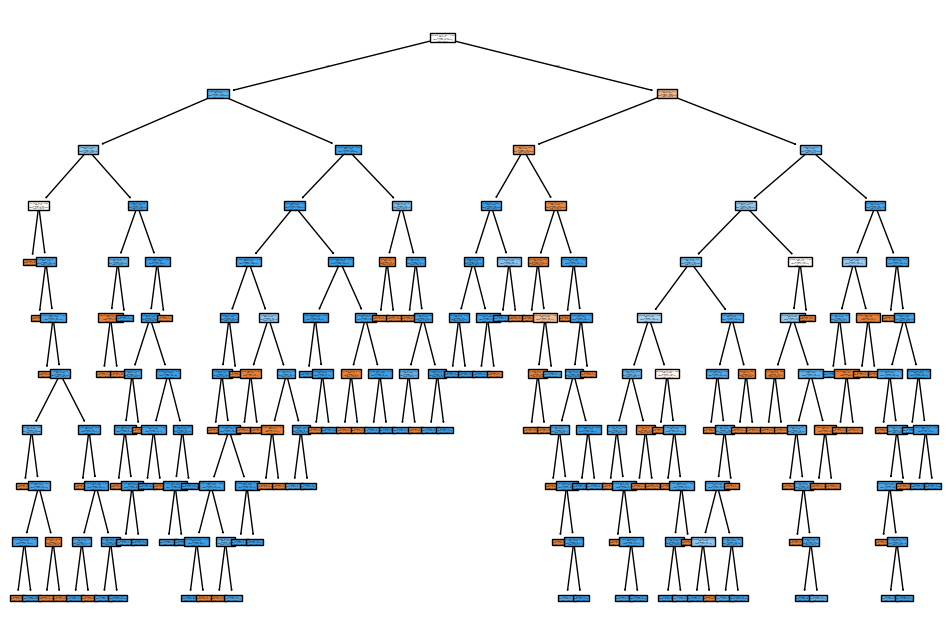

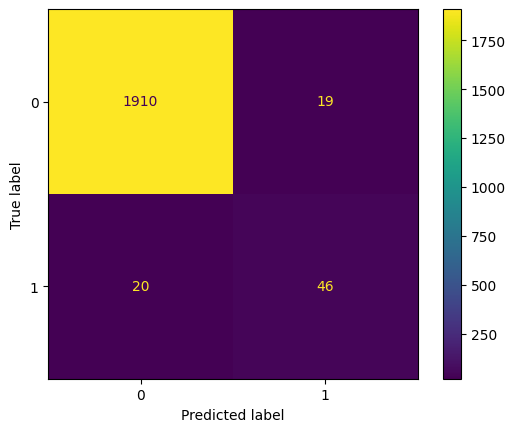

In [91]:
# Class Weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(b),
    y=b
)
class_weights_dict = dict(zip(np.unique(b), class_weights))

# Decision Tree with Hyperparameter Tuning
param_grid = {
    'max_depth': [5, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 5],
    'class_weight': [class_weights_dict],
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid_search.fit(A_train, b_train)
best_model = grid_search.best_estimator_

plt.figure(figsize=(12, 8))
plot_tree(best_model, feature_names=A.columns, class_names=['Class 0', 'Class 1'], filled=True)
plt.show()

b_proba = best_model.predict_proba(A_test)[:, 1]
threshold = 0.95
b_pred = (b_proba >= threshold).astype(int)

cf = confusion_matrix(b_test, b_pred)
disp = ConfusionMatrixDisplay(cf)
disp.plot()



In [92]:
tn, fp, fn, tp = cf.ravel()
accuracy = (tn + tp) / (tn + fp + fn + tp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print('Decision Tree Metrics:')
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 Score: ', f1_score)

Decision Tree Metrics:
Accuracy:  0.9804511278195489
Precision:  0.7076923076923077
Recall:  0.696969696969697
F1 Score:  0.702290076335878
